In [277]:
using QuantumOptics
using Plots
using LinearAlgebra
import IterTools, TupleTools

import Pkg; Pkg.status()
#Pkg.add("TupleTools")
#Pkg.add("IterTools")

Status `~/.julia/environments/v1.11/Project.toml`
  [a93c6f00] DataFrames v1.7.0
  [b7d42ee7] Einsum v0.4.1
  [7073ff75] IJulia v1.26.0
  [d1acc4aa] IntervalArithmetic v0.22.19
  [d2bf35a9] IntervalRootFinding v0.6.0
  [c8e1da08] IterTools v1.10.0
  [b964fa9f] LaTeXStrings v1.4.0
  [91a5bcdd] Plots v1.40.9
⌃ [c3e4b0f8] Pluto v0.19.47
  [7f904dfe] PlutoUI v0.7.60
  [92933f4c] ProgressMeter v1.10.2
  [6e0679c1] QuantumOptics v1.2.1
  [295af30f] Revise v3.6.4
  [f2b01f46] Roots v2.2.2
  [9d95972d] TupleTools v1.6.0
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [278]:
R1 = 10
x1 = collect(-R1:1:R1-1);
N1 = length(x1);
b1 = NLevelBasis(N1)

NLevel(N=20)

In [279]:
function fTa(b1)
    H1 = SparseOperator(b1)
    N1 = b1.N
    for i in 1:N1
        H1 += transition(b1,mod(i,N1)+1,i)
    end
    return H1
end

fTa (generic function with 1 method)

In [280]:
Ta = fTa(b1);

In [281]:
function fx1(b1)
    x1 = SparseOperator(b1)
    for i in 1:b1.N
        x1 += i*transition(b1,i,i)
    end
    return x1
end

fx1 (generic function with 1 method)

In [282]:
x1 = fx1(b1)

Operator(dim=20x20)
  basis: NLevel(N=20)sparse([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], ComplexF64[1.0 + 0.0im, 2.0 + 0.0im, 3.0 + 0.0im, 4.0 + 0.0im, 5.0 + 0.0im, 6.0 + 0.0im, 7.0 + 0.0im, 8.0 + 0.0im, 9.0 + 0.0im, 10.0 + 0.0im, 11.0 + 0.0im, 12.0 + 0.0im, 13.0 + 0.0im, 14.0 + 0.0im, 15.0 + 0.0im, 16.0 + 0.0im, 17.0 + 0.0im, 18.0 + 0.0im, 19.0 + 0.0im, 20.0 + 0.0im], 20, 20)

In [283]:
function fH1(J,b1)
    H1 = SparseOperator(b1)
    N1 = b1.N
    for i in 1:N1-1
        H1 += -J*transition(b1,i+1,i)
        H1 += transition(b1,i,i)
    end
    # PBC
    H1 += -J*transition(b1,N1,1)
    H1 += transition(b1,N1,N1)
    #
    H1 += H1'
    return H1
end

fH1 (generic function with 1 method)

In [284]:
J = 1
H1 = fH1(J,b1) #+ 2*J*identityoperator(b1)
E1, U1 = eigenstates(dense(H1));
scatter(E1)

In [285]:
E1[1:10]

10-element Vector{Float64}:
 1.7763568394002505e-15
 0.09788696740969494
 0.09788696740969671
 0.38196601125010465
 0.3819660112501073
 0.824429495415052
 0.8244294954150551
 1.3819660112501064
 1.3819660112501069
 1.9999999999999996

TE, TU = eigen(dense(Ta).data);

p1 = angle.(TE)./pi

Txp = Operator(b1, TU);
Tpx = dagger(Txp);

H1p = Tpx*H1*Txp

E1p, U1p = eigenstates((H1p+dagger(H1p))/2);
scatter(p1, E1p)

In [286]:
U=-5*J;

In [287]:
b2 = b1⊗b1
Vint = SparseOperator(b2)
for i in 1:b1.N
    Vint += U/2*transition(b1,i,i)⊗transition(b1,i,i)
end

In [288]:
x1_b2 = x1⊗identityoperator(b1)
x2_b2 = identityoperator(b1)⊗x1

r_b2 = x1_b2 - x2_b2
r2_b2 = r_b2*r_b2

Operator(dim=400x400)
  basis: [NLevel(N=20) ⊗ NLevel(N=20)]sparse([2, 3, 4, 5, 6, 7, 8, 9, 10, 11  …  390, 391, 392, 393, 394, 395, 396, 397, 398, 399], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11  …  390, 391, 392, 393, 394, 395, 396, 397, 398, 399], ComplexF64[1.0 + 0.0im, 4.0 + 0.0im, 9.0 + 0.0im, 16.0 + 0.0im, 25.0 + 0.0im, 36.0 + 0.0im, 49.0 + 0.0im, 64.0 + 0.0im, 81.0 + 0.0im, 100.0 + 0.0im  …  100.0 - 0.0im, 81.0 - 0.0im, 64.0 - 0.0im, 49.0 - 0.0im, 36.0 - 0.0im, 25.0 - 0.0im, 16.0 - 0.0im, 9.0 - 0.0im, 4.0 - 0.0im, 1.0 - 0.0im], 400, 400)

In [289]:
Nptl = 2
states_mb = bosonstates(b1, Nptl)
b_mb = ManyBodyBasis(b1, states_mb)

ManyBody(onebodybasis=NLevel(N=20), states:210)

In [290]:
function fHub(U,b2)
    ni = number(b2,1)
    id = identityoperator(b2)
    HHub = ni*(ni-id)/2
    for i in 2:b2.onebodybasis.N
        ni = number(b2,i)
        HHub += ni*(ni-id)/2
    end
    return U*HHub
end

fHub (generic function with 1 method)

In [291]:
H1kin = manybodyoperator(b_mb, H1) 
H_int = manybodyoperator(b_mb, Vint)
H_Hub = fHub(U,b_mb)
#H2 = H1kin + H_Hub;
H2 = H1kin + H_int;

#E2, U2 = eigenstates(H2);
E2, U2 = eigenstates(dense(H2));

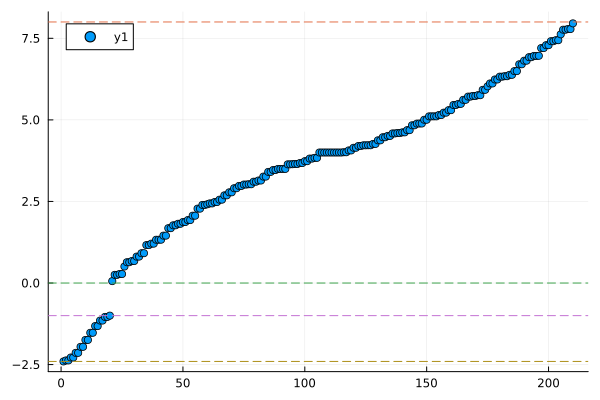

In [292]:
scatter(real(E2))
hline!([4*J+4*J], linestyle=:dash, label="")
hline!([-4*J+4*J], linestyle=:dash, label="")
hline!([U+4*J], linestyle=:dash, label="")
hline!([-sqrt(U^2+4*(2*J)^2)+4*J], linestyle=:dash, label="")

In [293]:
E2[1:6]

6-element Vector{Float64}:
 -2.4031242436458315
 -2.3724761329347177
 -2.3724761329347057
 -2.282685412390451
 -2.282685412390444
 -2.1402184004906006

## Subspace for the Cooper problem

In [294]:
b1_sub = SubspaceBasis(b1, U1[R1+1:N1]);
Ps = projector(b1_sub, b1);
Pst = dagger(Ps);

In [295]:
r2_sub = (Ps⊗Ps)*r2_b2*(Pst⊗Pst)

Operator(dim=100x100)
  basis: [Subspace(superbasis=NLevel(N=20), states:10) ⊗ Subspace(superbasis=NLevel(N=20), states:10)]
      66.0+0.0im  -1.78e-15+0.0im  …    -3.7e-16+0.0im       -1.0+0.0im
 -1.78e-15+0.0im    67.0528+0.0im       0.680668+0.0im       -1.0+0.0im
  -19.9192+0.0im  -2.39e-15+0.0im            0.0+0.0im    1.37638+0.0im
  -8.9e-16+0.0im    21.0615+0.0im          1.203+0.0im       -1.0+0.0im
   4.68328+0.0im  -7.11e-15+0.0im        7.5e-16+0.0im   -1.96261+0.0im
  2.66e-15+0.0im       -6.0+0.0im  …    -3.07672+0.0im        1.0+0.0im
   1.79611+0.0im  -2.22e-15+0.0im      -2.44e-15+0.0im   -3.07768+0.0im
  -8.9e-16+0.0im    3.42592+0.0im       -2.17625+0.0im       -1.0+0.0im
  0.683282+0.0im   1.33e-15+0.0im     -1.732e-14+0.0im   -6.31375+0.0im
 -5.33e-15+0.0im    2.04667+0.0im       -6.31375+0.0im  -0.707107+0.0im
 -7.11e-15+0.0im   -20.9443+0.0im  …    -4.2e-16+0.0im       -1.0+0.0im
  -20.9443+0.0im   -6.47214+0.0im       0.680668+0.0im       -1.0+0.0im
       0.0+

In [296]:
Ps*H1*Pst;

In [297]:
E1[R1+1:N1]

10-element Vector{Float64}:
 2.000000000000002
 2.618033988749895
 2.618033988749896
 3.1755705045849463
 3.1755705045849467
 3.6180339887498945
 3.6180339887498953
 3.9021130325903064
 3.9021130325903073
 4.0

In [298]:
(Ps⊗Ps)*Vint*(Pst⊗Pst);

In [299]:
sub_states_mb = bosonstates(b1_sub, Nptl)
b_mb_sub = ManyBodyBasis(b1_sub, sub_states_mb)

ManyBody(onebodybasis=Subspace(superbasis=NLevel(N=20), states:10), states:55)

In [300]:
H1kin_sub = manybodyoperator(b_mb_sub, Ps*H1*Pst ) 
H_int_sub = manybodyoperator(b_mb_sub, (Ps⊗Ps)*Vint*(Pst⊗Pst))
r2_mb = manybodyoperator(b_mb_sub, r2_sub)
H2_sub = H1kin_sub + H_int_sub;
H2_sub = (H2_sub+dagger(H2_sub))/2

#E2_sub, U2_sub = eigenstates(H2_sub);
E2_sub, U2_sub = eigenstates(dense(H2_sub));

In [301]:
scatter(E2_sub)

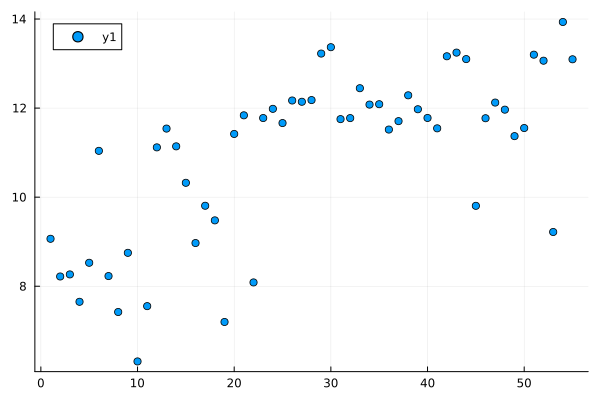

In [302]:
scatter( [sqrt(real( expect(r2_mb, U2_sub[i]) )) for i in 1:b_mb_sub.shape[1]])

In [303]:
b_mb_sub.shape[1]

55

## Martikainen: Cooper problem in a lattice

In [304]:
# pair CM of mass quasi-momentum in Valiente and Petrosyan
# this is Ekα in Matikainen
function fJK(K,J)
    return 2*J*cos(K/2)
end

fJK (generic function with 1 method)

In [305]:
function feq(q,J)
    return 2*J*(1-cos(q))
end

feq (generic function with 1 method)

In [306]:
function fKq(K,q,J)
    EK = fJK(K,J)
    return 2*EK*(cos(q)-1)+2*(2*J+EK)
end

fKq (generic function with 1 method)

In [307]:
length(kpoints)

20

In [308]:
function fRootE(E,K,J,g)
    sum=0.
    for q in kpoints
        sum += 1/(fKq(K,q,J)-E)
    end
    return sum+length(kpoints)/g
end

fRootE (generic function with 1 method)

In [309]:
E = -1
g = U
fRootE(E,0.,1.,g)

2.666679382336346

In [310]:
Elist = -7:0.01:10

-7.0:0.01:10.0

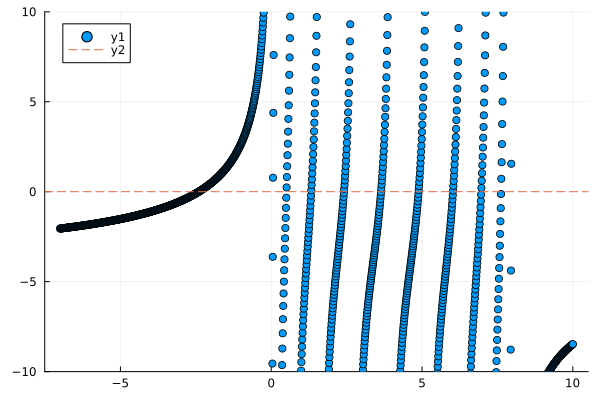

In [311]:
scatter(Elist, fRootE.(Elist,0.,1.,g), ylims=(-10,10))
hline!([0], linestyle=:dash)

In [312]:
using IntervalArithmetic, IntervalRootFinding, Roots

In [313]:
interval = IntervalArithmetic.interval(-2,8)

[-2.0, 8.0]_com

In [314]:
E0 = fzero(E->fRootE.(E,0.,1.,g), 7.9)
E0, E0-4, -sqrt(g^2+4*(2*J)^2)

(7.957716788538106, 3.9577167885381064, -6.4031242374328485)

In [315]:
fRootE(E0,0.,1.,g)

-5.551115123125783e-13

In [316]:
yroots = roots(E->fRootE.(E,0.,1.,g), interval);
yroots[1:2:end]

10-element Vector{Root{Interval{Float64}}}:
 Root([-5.18843e-08, 2.43257e-08]_com, :unknown)
 Root([0.195773, 0.195775]_com, :unknown)
 Root([0.763931, 0.763933]_com, :unknown)
 Root([1.64885, 1.64886]_com, :unknown)
 Root([2.76393, 2.76394]_com, :unknown)
 Root([3.999999, 4.00001]_com, :unknown)
 Root([5.23606, 5.23607]_com, :unknown)
 Root([6.35114, 6.35115]_com, :unknown)
 Root([7.23606, 7.23607]_com, :unknown)
 Root([7.80422, 7.80423]_com, :unknown)

In [317]:
xroots = find_zeros(E->fRootE.(E,0.,1.,g), -8, 8)
xroots[1:2:end]

11-element Vector{Float64}:
 -2.40312424364584
  0.058052167465274675
  0.5058492803547295
  1.3274347068290726
  2.4132813404773503
  3.641272971054052
  4.885914454158425
  6.027686081591503
  6.964350318575518
  7.621566134601806
  7.957716788538106

In [318]:
yroots[1].region.bareinterval.lo

-5.1884230832427436e-8

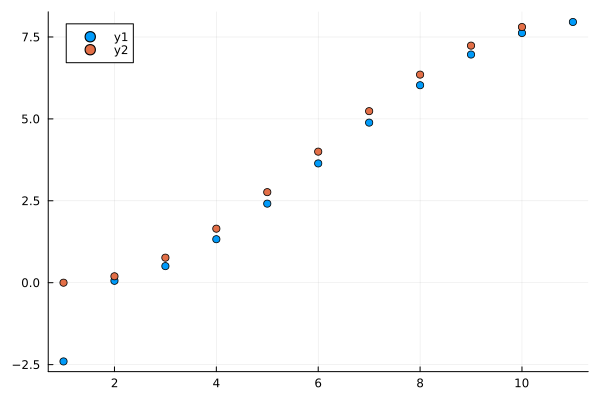

In [319]:
scatter(xroots[1:2:end])
scatter!([yroot.region.bareinterval.lo for yroot in yroots[1:2:end]])

In [320]:
fRootE.(xroots,0.,1.,g)

21-element Vector{Float64}:
  0.0
 Inf
 -8.881784197001252e-16
 Inf
 -4.440892098500626e-15
 Inf
 -2.6645352591003757e-15
 Inf
 -7.105427357601002e-15
 Inf
 -2.220446049250313e-15
 Inf
 -1.4210854715202004e-14
 Inf
 -2.220446049250313e-15
 Inf
 -3.197442310920451e-14
 Inf
 -4.085620730620576e-14
 Inf
 -5.551115123125783e-13

In [321]:
Klist = LinRange(-.1,.1,11)

11-element LinRange{Float64, Int64}:
 -0.1, -0.08, -0.06, -0.04, -0.02, 0.0, 0.02, 0.04, 0.06, 0.08, 0.1

In [322]:
Eb_list=[]
for K in Klist
    push!( Eb_list, find_zeros(E->fRootE.(E,K,1.,g), -5, 0)[1])
end

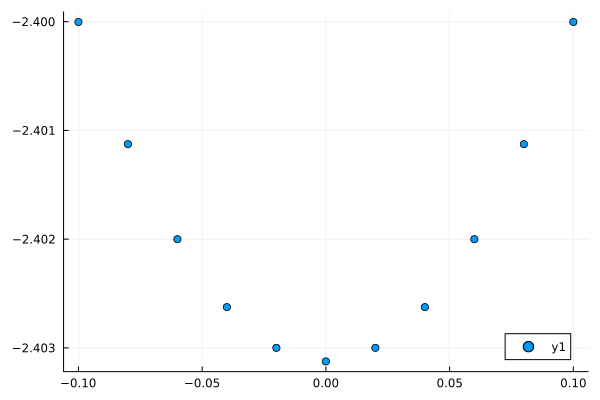

In [323]:
scatter(Klist,Eb_list)
#hline!([eF])

In [324]:
[derivative2(Klist, Eb_list, i) for i=1:length(Klist)]

11-element Vector{Float64}:
 0.6224857015986931
 0.6232810882438513
 0.6238997155295455
 0.6243415827323727
 0.6246066995579027
 0.6246950712385242
 0.6246066995580878
 0.6243415827326503
 0.6238997155295455
 0.6232810882441289
 0.622485701597953

In [325]:
derivative2(Klist, Eb_list, floor(Int,length(Klist)/2)+1)

0.6246950712385242

## Cooper problem

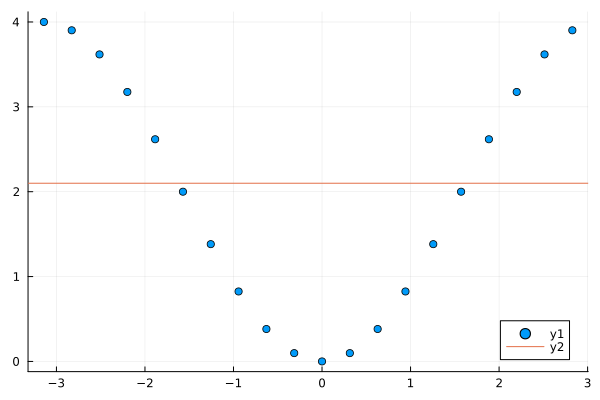

In [326]:
eF = feq(kpoints[floor(Int,N1/4)+1],J)+0.1
scatter(kpoints,feq.(kpoints,J))
hline!([eF])

In [327]:
kpoints[ feq.(kpoints,J) .> eF ]./pi

9-element Vector{Float64}:
 -1.0
 -0.9
 -0.8
 -0.7
 -0.6
  0.6
  0.7
  0.8
  0.9

In [328]:
function fRootE_Cooper(E,K,J,g,kpoints)
    sum=0.
    for q in kpoints
        sum += 1/(fKq(K,q,J)-E)
    end
    return sum+length(kpoints)/g
end

fRootE_Cooper (generic function with 1 method)

In [360]:
res = []
for E in Elist
    push!(res,fRootE_Cooper(E,0.,1.,g,kpoints[ feq.(kpoints,J) .> eF ]))
    #scatter(E, fRootE_Cooper(E,0.,1.,g,kpoints[ feq.(kpoints,J) .> eF ]), ylims=(-10,10))
end

In [361]:
scatter(Elist, res, ylims=[-10,10])
hline!([0], linestyle=:dash)

In [363]:
find_zeros(E->fRootE_Cooper(E,0,1.,g,kpoints[ feq.(kpoints,J) .> eF ]), -5, 0)[1]

-3.989853077781727

In [332]:
EbC_list=[]
for K in Klist
    push!( EbC_list, find_zeros(E->fRootE_Cooper(E,K,1.,g,kpoints[ feq.(kpoints,J) .> eF ]), -5, 0)[1])
end

In [333]:
1/derivative2(Klist, EbC_list, floor(Int,length(Klist)/2)+1)

1.2681880871084328

In [334]:
scatter(Klist,EbC_list)

# (Bloch basis) k-space

In [335]:
xmin = -R1
xmax = R1
b_position = PositionBasis(xmin, xmax, N1)
b_momentum = MomentumBasis(b_position)

x_op = position(b_position)
p_op = momentum(b_position);

In [336]:
xpoints = samplepoints(b_position);
kpoints = samplepoints(b_momentum);
dk = spacing(b_momentum)

0.3141592653589793

In [337]:
kpoints/pi

20-element Vector{Float64}:
 -1.0
 -0.9
 -0.8
 -0.7
 -0.6
 -0.5
 -0.4
 -0.3
 -0.2
 -0.1
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9

In [338]:
KCM_values = []
K2sub_list = []
N1half = Integer(ceil(N1/2))

#for nksum in N1half+2:N1+1
for nksum in 2:N1+1
    # @show nksum
    ik2_list=[]
    for ik in 1:Integer(floor(nksum/2))
        push!(ik2_list,(ik,nksum-ik))
    end
    for ik in 1:N1half-Integer(ceil(nksum/2))+1
        push!(ik2_list,(ik+nksum-1,N1-ik+1))
        #push!(ik2_list,(mod(N1+ik-2,N1+1),mod(nksum-ik+1,N1+1)+1))
    end
    @show ik2_list
    push!(KCM_values,pi*(mod(kpoints[1]/pi+kpoints[nksum-1]/pi+1,2)-1))
    push!(K2sub_list,ik2_list)
end

ik2_list = Any[(1, 1), (2, 20), (3, 19), (4, 18), (5, 17), (6, 16), (7, 15), (8, 14), (9, 13), (10, 12), (11, 11)]
ik2_list = Any[(1, 2), (3, 20), (4, 19), (5, 18), (6, 17), (7, 16), (8, 15), (9, 14), (10, 13), (11, 12)]
ik2_list = Any[(1, 3), (2, 2), (4, 20), (5, 19), (6, 18), (7, 17), (8, 16), (9, 15), (10, 14), (11, 13), (12, 12)]
ik2_list = Any[(1, 4), (2, 3), (5, 20), (6, 19), (7, 18), (8, 17), (9, 16), (10, 15), (11, 14), (12, 13)]
ik2_list = Any[(1, 5), (2, 4), (3, 3), (6, 20), (7, 19), (8, 18), (9, 17), (10, 16), (11, 15), (12, 14), (13, 13)]
ik2_list = Any[(1, 6), (2, 5), (3, 4), (7, 20), (8, 19), (9, 18), (10, 17), (11, 16), (12, 15), (13, 14)]
ik2_list = Any[(1, 7), (2, 6), (3, 5), (4, 4), (8, 20), (9, 19), (10, 18), (11, 17), (12, 16), (13, 15), (14, 14)]
ik2_list = Any[(1, 8), (2, 7), (3, 6), (4, 5), (9, 20), (10, 19), (11, 18), (12, 17), (13, 16), (14, 15)]
ik2_list = Any[(1, 9), (2, 8), (3, 7), (4, 6), (5, 5), (10, 20), (11, 19), (12, 18), (13, 17), (14, 16), (15, 15)]
i

In [339]:
mod(-1.3+1,2)-1

0.7

In [340]:
sort( K2sub_list[1] )

11-element Vector{Any}:
 (1, 1)
 (2, 20)
 (3, 19)
 (4, 18)
 (5, 17)
 (6, 16)
 (7, 15)
 (8, 14)
 (9, 13)
 (10, 12)
 (11, 11)

In [341]:
Set( sort(K2sub_list[1]) )

Set{Any} with 11 elements:
  (3, 19)
  (11, 11)
  (8, 14)
  (5, 17)
  (10, 12)
  (1, 1)
  (9, 13)
  (2, 20)
  (6, 16)
  (7, 15)
  (4, 18)

In [342]:
KCM_values/pi

20-element Vector{Float64}:
  0.0
  0.10000000000000009
  0.19999999999999996
  0.30000000000000004
  0.3999999999999999
  0.5
  0.6000000000000001
  0.7
  0.8
  0.8999999999999999
 -1.0
 -0.9
 -0.8
 -0.7
 -0.6
 -0.5
 -0.4
 -0.30000000000000004
 -0.19999999999999996
 -0.09999999999999998

In [343]:
ones(2,2)-diagm(repeat([1],2))

2×2 Matrix{Float64}:
 0.0  1.0
 1.0  0.0

In [344]:
same_state=[]
for (i,(ik1,ik2)) in enumerate(K2sub_list[1])
    if ik1==ik2
        push!(same_state,i)
    end
end
same_state

2-element Vector{Any}:
  1
 11

In [345]:
resE2U2 = []
for (iK, KCM) in enumerate(KCM_values)
    dH = length(K2sub_list[iK])
    HK2 = zeros(dH,dH)
    same_state=[]
    for (i,(ik1,ik2)) in enumerate(K2sub_list[iK])
        if ik1==ik2
            push!(same_state,i)
        end
    end
    # diagonal elements
    for (i,(ik1,ik2)) in enumerate(K2sub_list[iK])
        k1 = kpoints[ik1]
        k2 = kpoints[ik2]
        HK2[i,i] = -2*J*(cos(k1)+cos(k2)) #+ 2*U/N1
        #if ik1==ik2
            #@show i, ik1, ik2
        #    HK2[i,i] += U/N1
        #else
        #    HK2[i,i] += 2*U/N1
        #end
    end
    # interaction, mostly off-diagonal elements
    if dH>1  
        #HK2 .+= 2*U/N1*(ones(dH,dH)-diagm(repeat([1],dH)))
        HK2 .+= 2*U/N1*ones(dH,dH)
        for i in same_state
            HK2[i,i] -= U/N1
            for j in 1:dH
                if i != j
                    HK2[i,j] = sqrt(2)*U/N1
                    HK2[j,i] = sqrt(2)*U/N1
                end
            end
        end
        if same_state != []
            HK2[same_state[1],same_state[2]] = U/N1
            HK2[same_state[2],same_state[1]] = U/N1
        end
    end
    push!(resE2U2, eigen(HK2))
end

In [346]:
plt=scatter()
for (iK, (E2, U2)) in enumerate(resE2U2)
    #@show E2
    scatter!(repeat([KCM_values[iK]/pi], length(E2)),E2, c=:blue, label="", xlabel="Center of mass quasi-momentum K")
end
hline!([4*J], linestyle=:dash, label="")
hline!([-4*J], linestyle=:dash, label="")
hline!([U], linestyle=:dash, label="")
hline!([-sqrt(U^2+4*(2*J)^2)], linestyle=:dash, label="")

In [347]:
-sqrt(U^2+4*(2*J)^2)+4

-2.4031242374328485

### Cooper problem

In [348]:
kCpoints = kpoints[ feq.(kpoints,J) .> eF ]

9-element Vector{Float64}:
 -3.141592653589793
 -2.827433388230814
 -2.5132741228718345
 -2.199114857512855
 -1.8849555921538759
  1.8849555921538759
  2.199114857512855
  2.5132741228718345
  2.827433388230814

In [349]:
KCM_list = []
for k1 in kCpoints
    for k2 in kCpoints
        KCM = k1 + k2
        #println(k1/pi," ", k2/pi, KCM/pi)
        push!(KCM_list, KCM)
    end
end

In [350]:
KCM_values = unique( mod.(KCM_list, 2*pi) )
NKCM = length(KCM_values)

17

In [351]:
KCM_values .== pi/2

17-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0

In [352]:
K2sub_list = []
for k1 in kCpoints
    for k2 in kCpoints
        KCM = k1 + k2
        if mod(KCM,2*pi) == 0
            push!(K2sub_list, [k1,k2])
        end
    end
end

In [353]:
K2sub_list

9-element Vector{Any}:
 [-3.141592653589793, -3.141592653589793]
 [-2.827433388230814, 2.827433388230814]
 [-2.5132741228718345, 2.5132741228718345]
 [-2.199114857512855, 2.199114857512855]
 [-1.8849555921538759, 1.8849555921538759]
 [1.8849555921538759, -1.8849555921538759]
 [2.199114857512855, -2.199114857512855]
 [2.5132741228718345, -2.5132741228718345]
 [2.827433388230814, -2.827433388230814]

In [356]:
K2sub_list = K2sub_list[1:5]
K2sub_list

5-element Vector{Any}:
 [-3.141592653589793, -3.141592653589793]
 [-2.827433388230814, 2.827433388230814]
 [-2.5132741228718345, 2.5132741228718345]
 [-2.199114857512855, 2.199114857512855]
 [-1.8849555921538759, 1.8849555921538759]

In [357]:
dH = length(K2sub_list)
HK2 = zeros(dH,dH)
same_state=[]
for (i,(ik1,ik2)) in enumerate(K2sub_list)
    if ik1==ik2
        push!(same_state,i)
    end
end
# diagonal elements
for (i,(k1,k2)) in enumerate(K2sub_list)
    #k1 = kCpoints[ik1]
    #k2 = kCpoints[ik2]
    HK2[i,i] = -2*J*(cos(k1)+cos(k2)) #+ 2*U/N1
end
# interaction, mostly off-diagonal elements
if dH>1  
    #HK2 .+= 2*U/N1*(ones(dH,dH)-diagm(repeat([1],dH)))
    HK2 .+= 2*U/N1*ones(dH,dH)
    for i in same_state
        HK2[i,i] -= U/N1
        for j in 1:dH
            if i != j
                HK2[i,j] = sqrt(2)*U/N1
                HK2[j,i] = sqrt(2)*U/N1
            end
        end
    end
    #if same_state != []
    #    HK2[same_state[1],same_state[2]] = U/N1
    #    HK2[same_state[2],same_state[1]] = U/N1
    #end
end

In [358]:
eigen(HK2)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
5-element Vector{Float64}:
 0.06393965812567881
 1.8719774480695905
 2.8919215783049816
 3.594994954818137
 3.954669390031704
vectors:
5×5 Matrix{Float64}:
 0.169589  -0.119406   0.171556  -0.297335    0.916047
 0.252388  -0.185975   0.294681  -0.813945   -0.390348
 0.297593  -0.263435   0.781175   0.474477   -0.0817215
 0.412733  -0.749951  -0.49713    0.136915   -0.0366225
 0.805376   0.565095  -0.162356   0.0721949  -0.0216013

# Valiente and Petrosyan exact solution

In [133]:
function fH2rel(K,U,brel)
    JK = fJK(K,J);
    H2rel = SparseOperator(brel)
    Nrel = brel.N
    for i in 1:Nrel-1
        H2rel += -JK*transition(brel,i+1,i)
    end
    # PBC
    H2rel += -JK*transition(brel,1,Nrel)
    #
    H2rel += H2rel'
    # interaction
    i0 = Integer((Nrel+1)//2)
    H2rel += U*transition(brel,i0,i0)
    return H2rel
end

fH2rel (generic function with 1 method)

In [134]:
Rrel = R1
xpoints = collect(-Rrel:1:Rrel);
Nrel = 2*Rrel+1;
brel = NLevelBasis(Nrel);

In [135]:
K = 0*pi;

In [136]:
H2K = fH2rel(K,U,brel)

Operator(dim=21x21)
  basis: NLevel(N=21)sparse([2, 21, 1, 3, 2, 4, 3, 5, 4, 6  …  16, 18, 17, 19, 18, 20, 19, 21, 1, 20], [1, 1, 2, 2, 3, 3, 4, 4, 5, 5  …  17, 17, 18, 18, 19, 19, 20, 20, 21, 21], ComplexF64[-2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im  …  -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im], 21, 21)

In [137]:
E2K, U2K = eigenstates(dense(H2K));

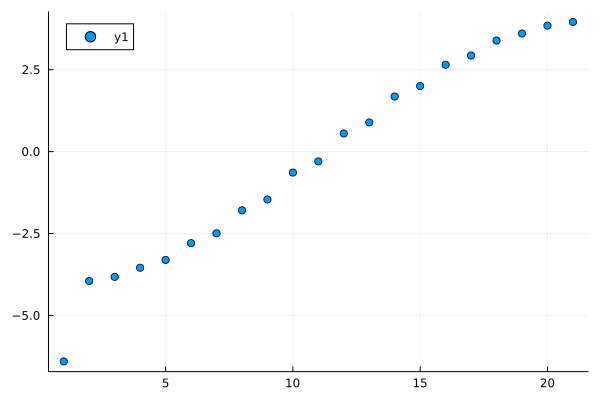

In [138]:
scatter(E2K)

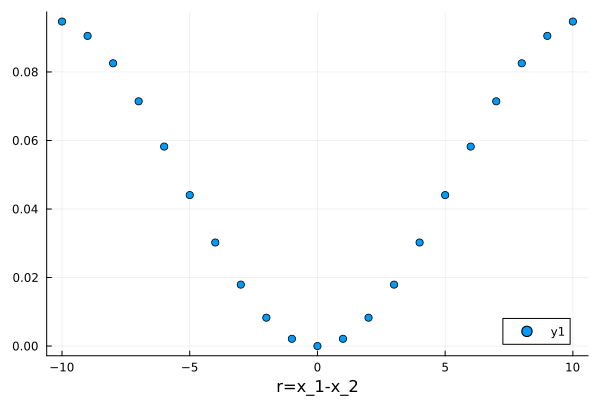

In [139]:
scatter(xpoints,abs.(U2K[end].data).^2, xlabel="r=x_1-x_2")

In [140]:
# participation ratio
sum( abs.(U2K[1].data).^4 ) 

0.6285041533044383

In [141]:
# expectation value of r^2: <r^2>
sum( (xpoints.^2).*abs.(U2K[1].data).^2)

0.320000327652341

In [142]:
dK=2*pi/(Nrel-1)
Klist=collect(-pi:dK:pi-dK)

plt=scatter();

E2Ks = []
for K in Klist
    H2K = fH2rel(K,U,brel)
    E2K, U2K = eigenstates(dense(H2K))
    PR = []
    for psi in U2K
        push!(PR, sum( 1/abs.(psi.data).^4/Nrel ) )
    end
    scatter!(repeat([K/pi], Nrel), E2K, zcolor=PR, c=:oslo, label="");
    push!(E2Ks,E2K)
end
hline!([4*J], linestyle=:dash, c=:grey, label="")
hline!([-4*J], linestyle=:dash, c=:grey,label="")
hline!([U], linestyle=:dash, c=:grey, label="")
hline!([-sqrt(U^2+4*(2*J)^2)], linestyle=:dash, c=:grey, label="")

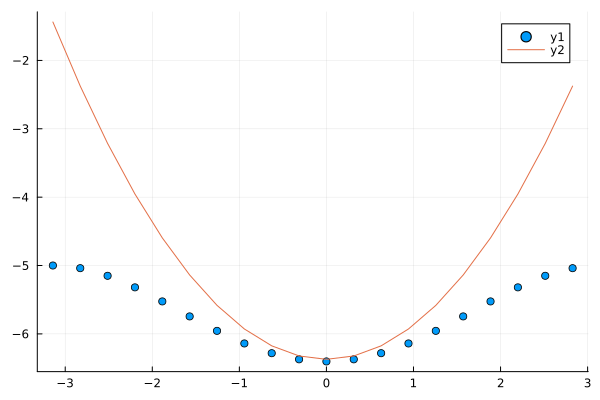

In [143]:
Ebound = [E2K[1] for E2K in E2Ks]
d2EdK2 = [derivative2(Klist, Ebound, i) for i=1:length(Klist)]
scatter(Klist,Ebound)
plot!(Klist, 0.5*(Klist.^2).+Ebound[Rrel])

In [144]:
scatter(Klist, (1.)./d2EdK2 )

In [145]:
function derivative2(x, y, i)
    Nx = length(x)
    @assert Nx >= 5
    dx = x[2] - x[1]
    if i == 1
        dy = 35*y[i] - 104*y[i + 1] + 114*y[i+2] - 56*y[i+3] + 11*y[i+4]
    elseif i == 2
        dy = 11*y[i-1] -20*y[i] + 6*y[i+1] + 4*y[i+2] - y[i+3]
    elseif i == Nx-1
        dy = -y[i-3] + 4*y[i-2] + 6*y[i-1] - 20*y[i] + 11*y[i+1]
    elseif i == Nx
        dy = 11*y[i-4] - 56*y[i-3] + 114*y[i-2] - 104*y[i-1] + 35*y[i]
    else
        dy = -y[i-2] + 16*y[i-1] - 30*y[i] + 16*y[i+1] - y[i+2]
    end
    dy = dy / (12 * dx^2)
    return dy
end

x = range(-10, 10, length=101)
y = @. x.^2

dy = [derivative2(x, y, i) for i=1:length(x)]

@assert isapprox(dy, 2*ones(length(x)))

## Complex interaction (Non-Hermitian Hamiltonian)

In [146]:
K = 0*pi
UR = U
UI = U/10
UC = UR + 1im*UI
H2K = fH2rel(K,UC,brel)

Operator(dim=21x21)
  basis: NLevel(N=21)sparse([2, 21, 1, 3, 2, 4, 3, 5, 4, 6  …  16, 18, 17, 19, 18, 20, 19, 21, 1, 20], [1, 1, 2, 2, 3, 3, 4, 4, 5, 5  …  17, 17, 18, 18, 19, 19, 20, 20, 21, 21], ComplexF64[-2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im  …  -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im, -2.0 + 0.0im], 21, 21)

In [147]:
ishermitian(H2K)

false

In [148]:
E2C, U2C = eigen(dense(H2K).data);

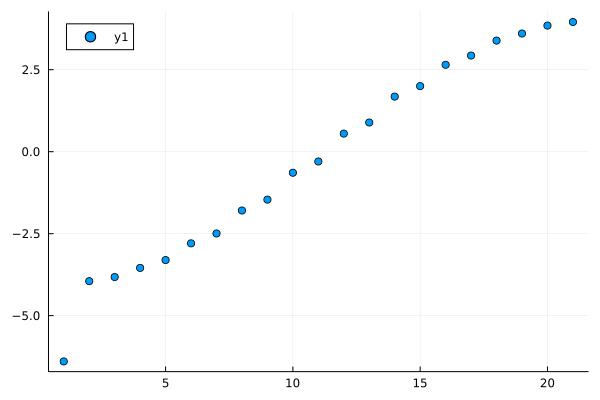

In [149]:
scatter(real(E2C))

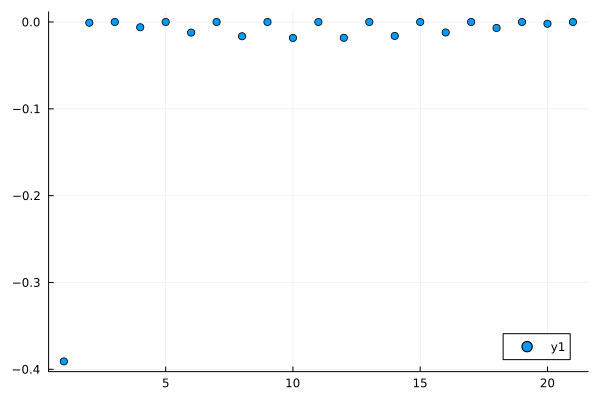

In [150]:
scatter(imag(E2C))